# Ejemplo de regresión lineal en R

**Para este ejemplo tomaremos el data set llamado "Boston" del paquete MASS. Intentaremos predecir el valor de medio de las viviendas de un barrio (medv) en función de 13 variables, como el número promedio de habitaciones de la vivienda (rm), antigüedad (age), etc.**

In [1]:
Boston <- read.csv(file="Boston_data.csv", sep=",", head=TRUE)
head(Boston)

,X,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


**This data frame contains the following columns:** 

crim: per capita crime rate by town. 

zn: proportion of residential land zoned for lots over 25,000 sq.ft. 

indus: proportion of non-retail business acres per town. 

chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). 

nox: nitrogen oxides concentration (parts per 10 million). 

rm: average number of rooms per dwelling. 

age: proportion of owner-occupied units built prior to 1940. 

dis: weighted mean of distances to five Boston employment centres. 

rad: index of accessibility to radial highways. 

tax: full-value property-tax rate per $10,000. 

ptratio: pupil-teacher ratio by town. 

black: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town. 

lstat: lower status of the population (percent). 

medv: median value of owner-occupied homes in $1000s.

**Empecemos por ejemplo, a ver si existe alguna relación entre el precio (medv) y el porcentaje de habitantes con bajo estado socioeconómico (lstat)**

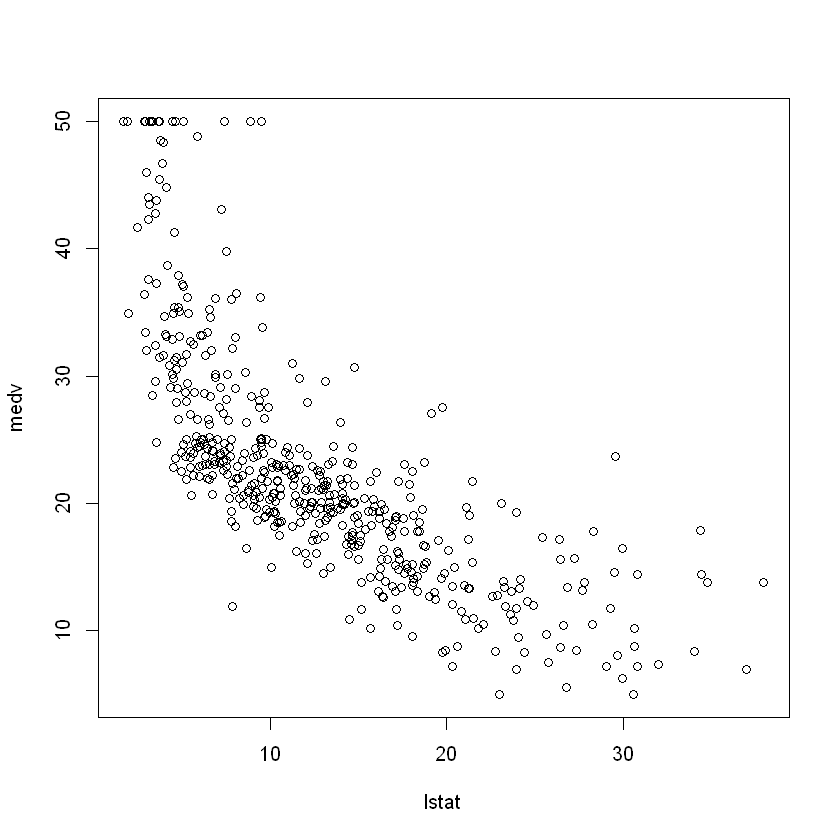

In [2]:
attach(Boston)
plot(lstat, medv)

**Observamos cierta dependencia, aunque no sea lineal, probaremos primero con una recta de regresión.**

In [3]:
lm.fit = lm(medv~lstat, data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


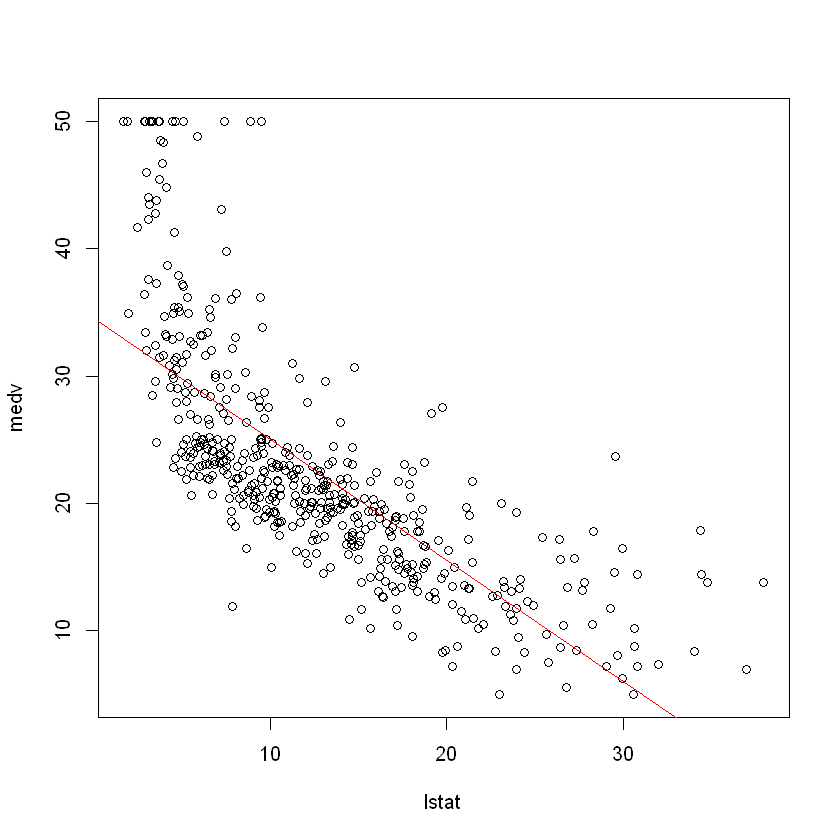

In [4]:
plot(lstat, medv)
abline(lm.fit, col = "red")

**Parece que el ajuste se podría mejorar usando un polinomio de 2º grado.**

In [5]:
lm.fit2 = lm(medv~lstat+I(lstat^2))
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


**Efectivamente, el valor de $R^2$ es mejor.**

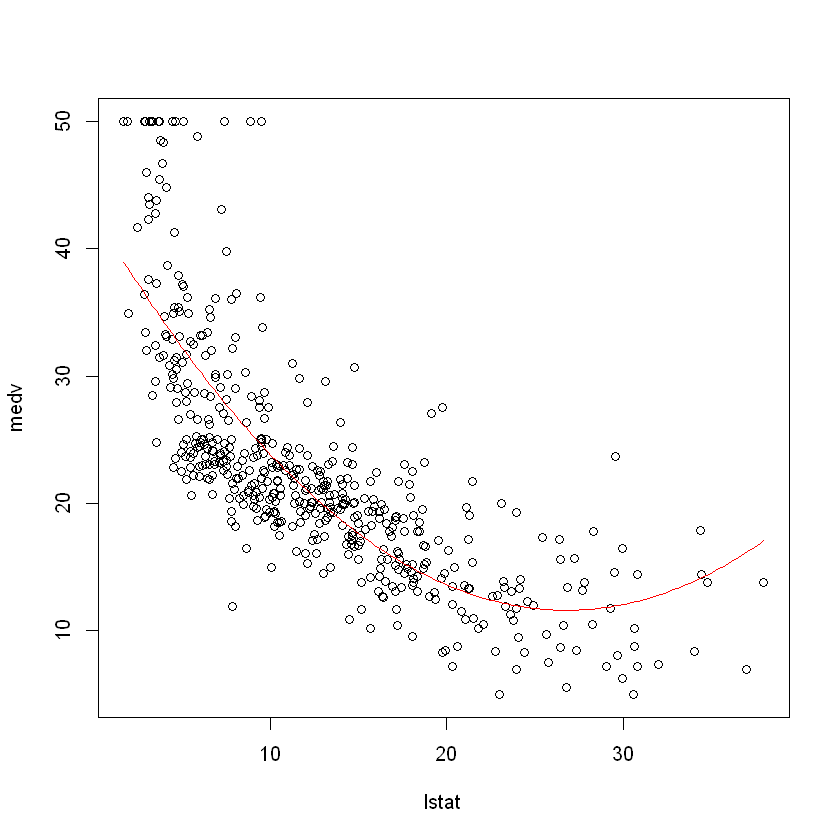

In [6]:
plot(lstat, medv)
new.data = data.frame(lstat = seq(from = min(Boston$lstat), to = max(Boston$lstat), length.out = 200))
pred_lm <- predict(lm.fit2, newdata = new.data)                      
lines(pred_lm ~ new.data$lstat, col = "red")

**Podemos incluir los intervalos de confianza y de predicción de la regresión en el gráfico.**

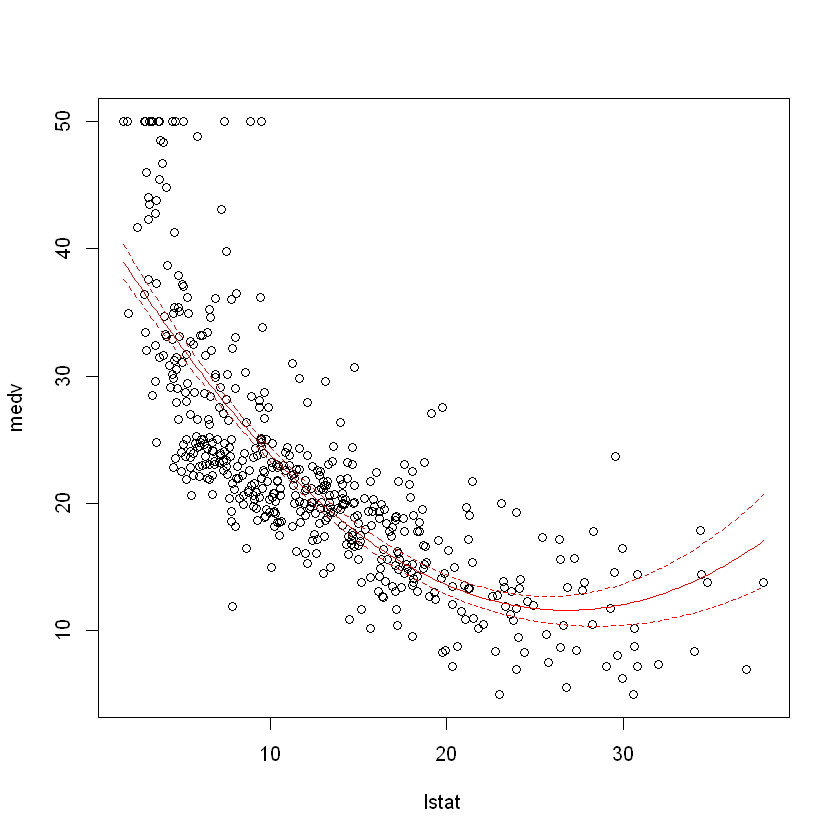

In [7]:
plot(lstat, medv)
lines(pred_lm ~ new.data$lstat, col = "red")
prd<-predict(lm.fit2,newdata=new.data,interval = "confidence", level = 0.95)
newx<-seq(from = min(Boston$lstat), to = max(Boston$lstat), length.out = 200)
lines(newx,prd[,2],col="red",lty=2)
lines(newx,prd[,3],col="red",lty=2)

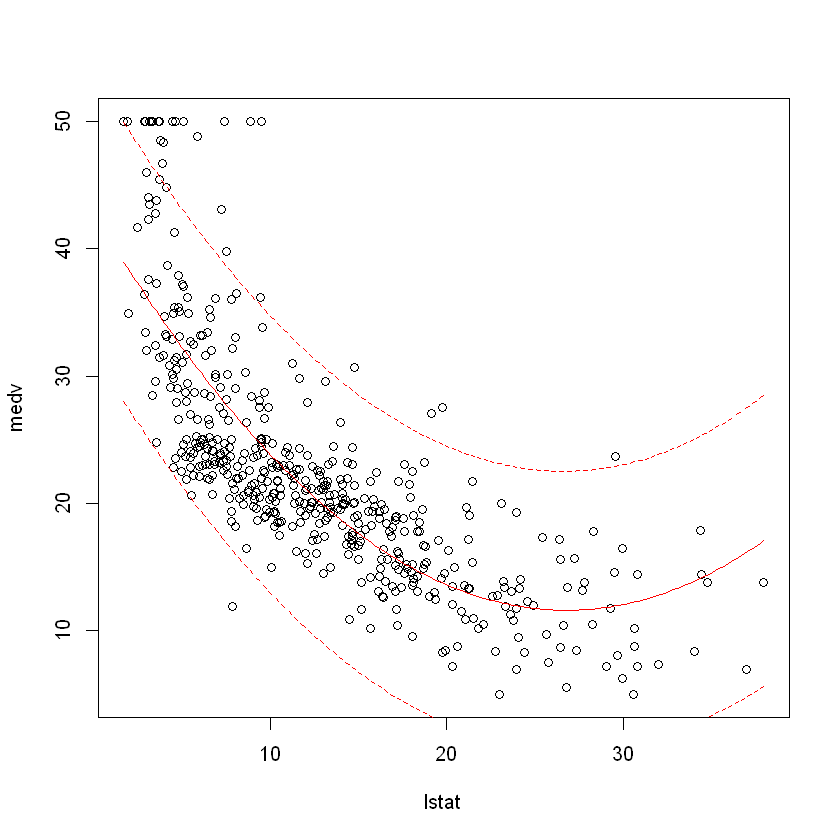

In [8]:
plot(lstat, medv)
lines(pred_lm ~ new.data$lstat, col = "red")
prd2<-predict(lm.fit2,newdata=new.data,interval = "prediction", level = 0.95)
lines(newx,prd2[,2],col="red",lty=2)
lines(newx,prd2[,3],col="red",lty=2)

**Podemos utilizar la función predict() para obtener una predicción del valor de las viviendas con para unos valores determinados de lstat, en un cierto intervalo de confianza. Por ejemplo, para el 5%, 10% y 15% de problación con pocos recursos:**

In [9]:
predict(lm.fit2, data.frame(lstat=c(5, 10, 15)), interval="prediction", level=0.95)

,fit,lwr,upr
1,32.28657,21.403051,43.17010
2,23.88849,13.022109,34.75486
3,17.66774,6.794348,28.54113


**La función plot() produce 4 figuras de diagnóstico.**

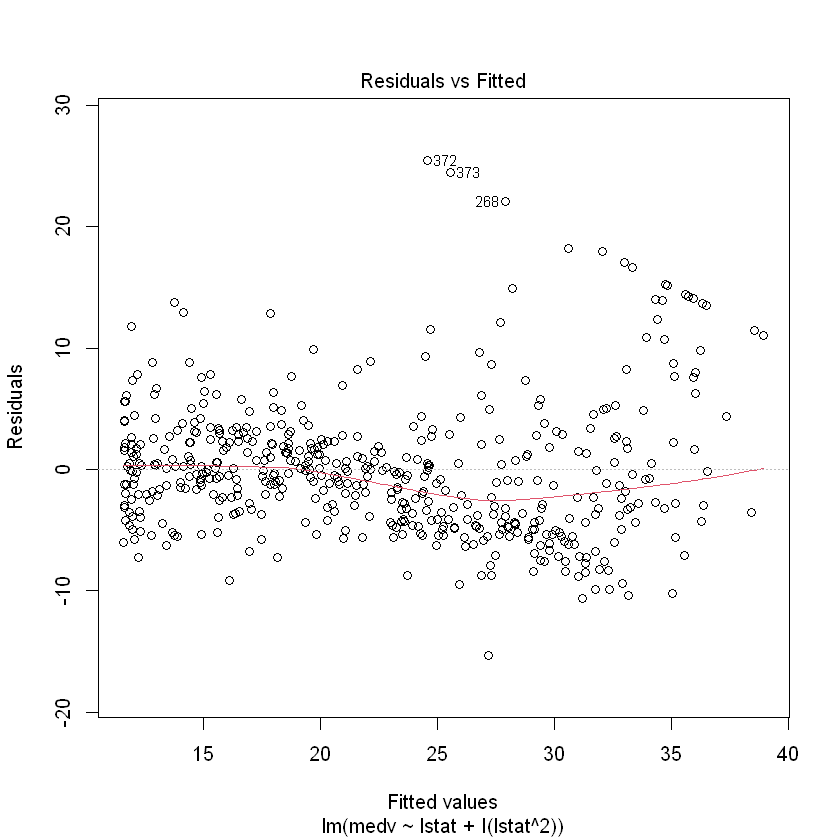

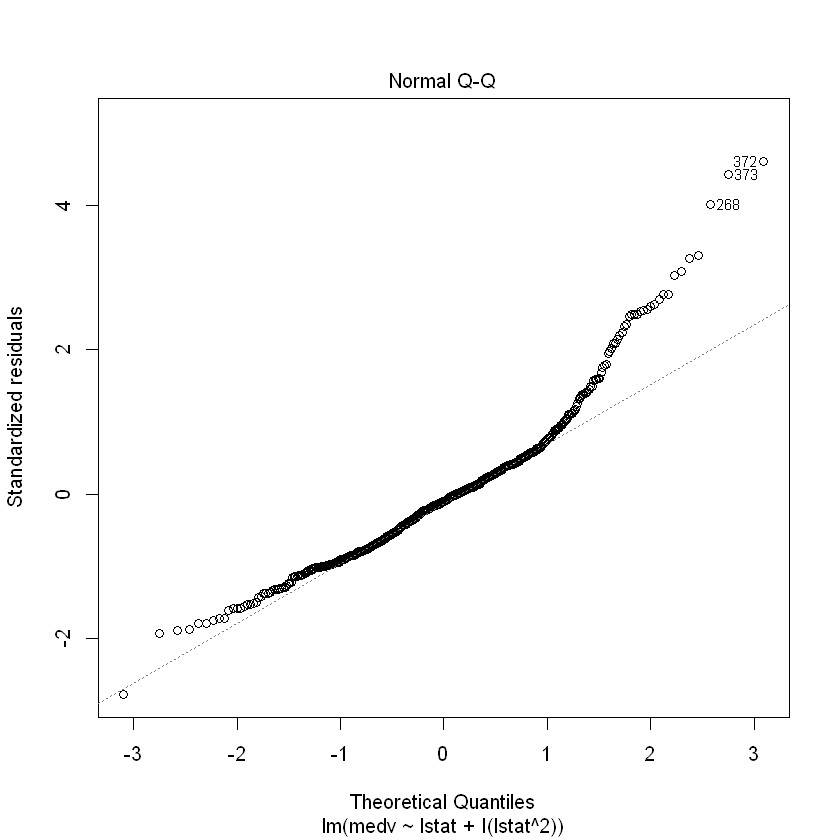

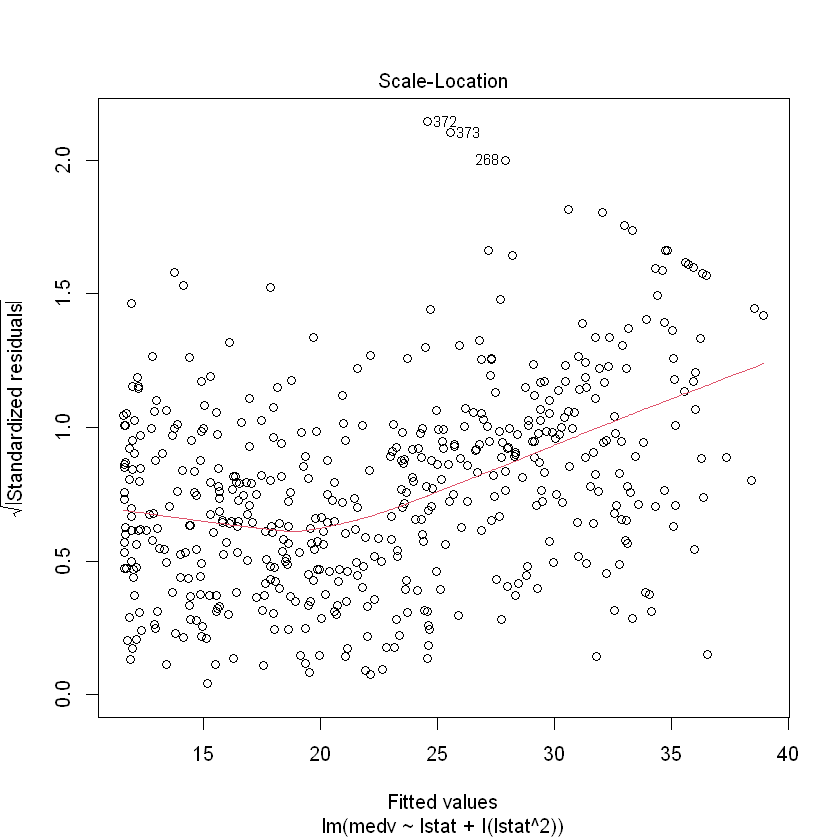

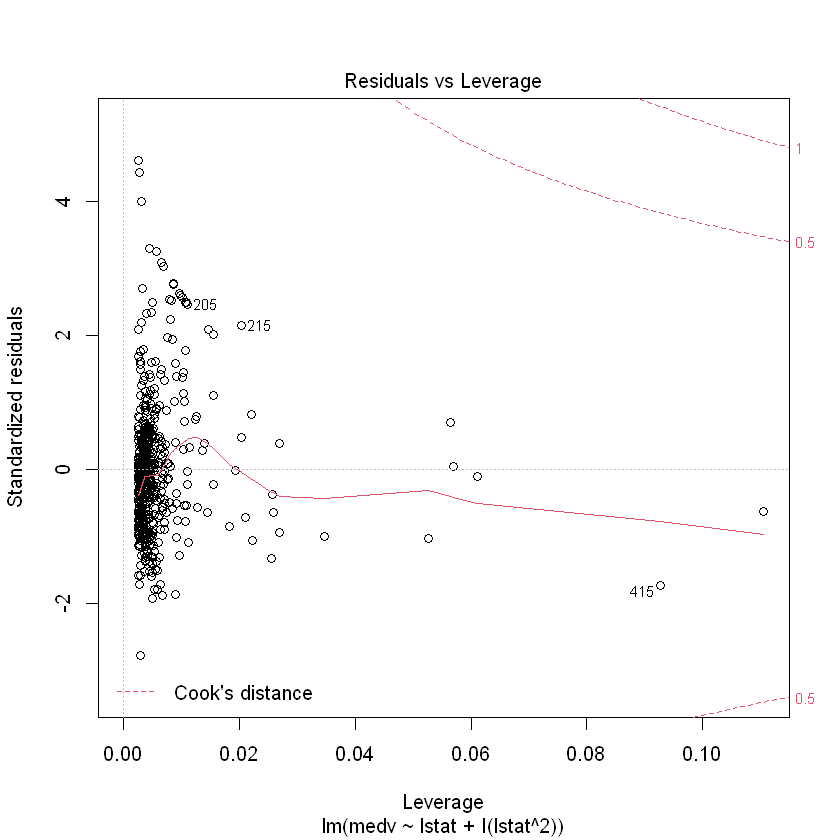

In [10]:
plot(lm.fit2)

**También podemos visualizar los residuos de otras maneras.**

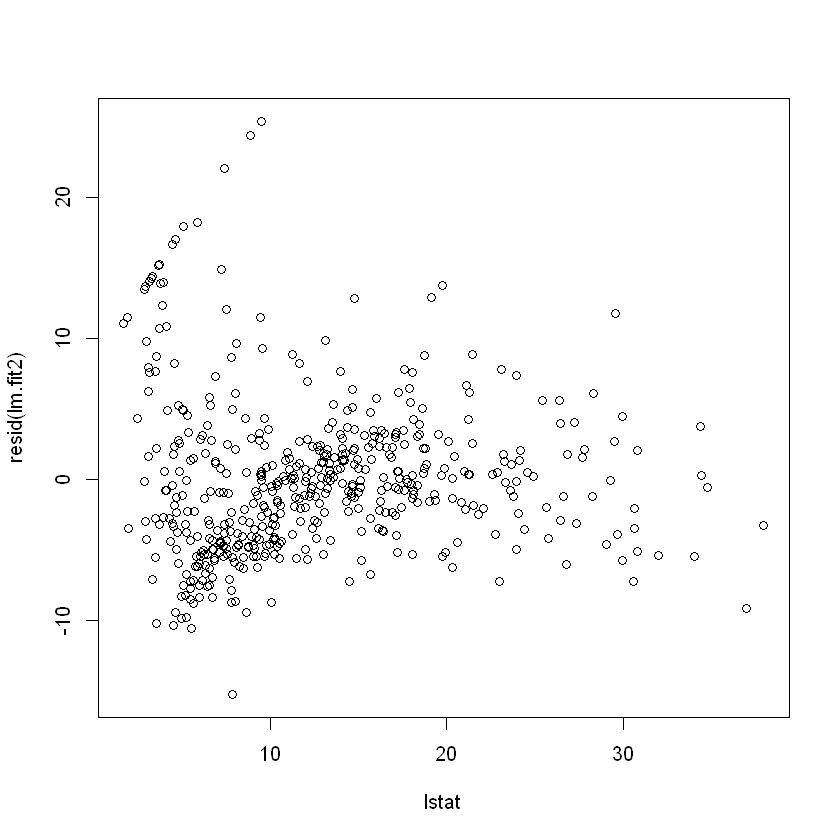

In [11]:
plot(lstat, resid(lm.fit2))

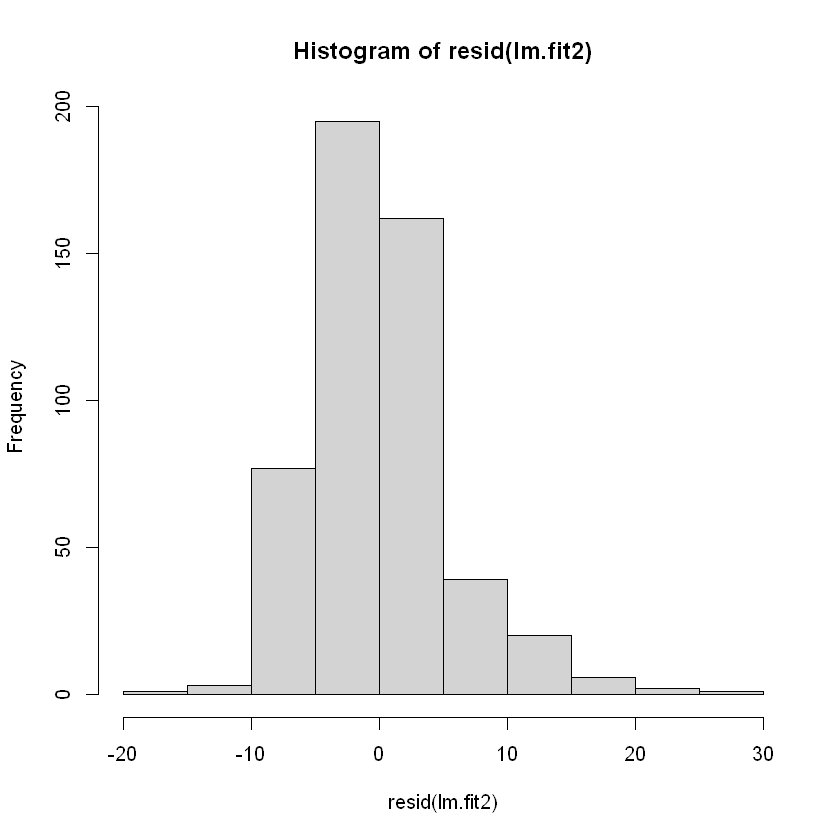

In [12]:
hist(resid(lm.fit2), breaks=10)

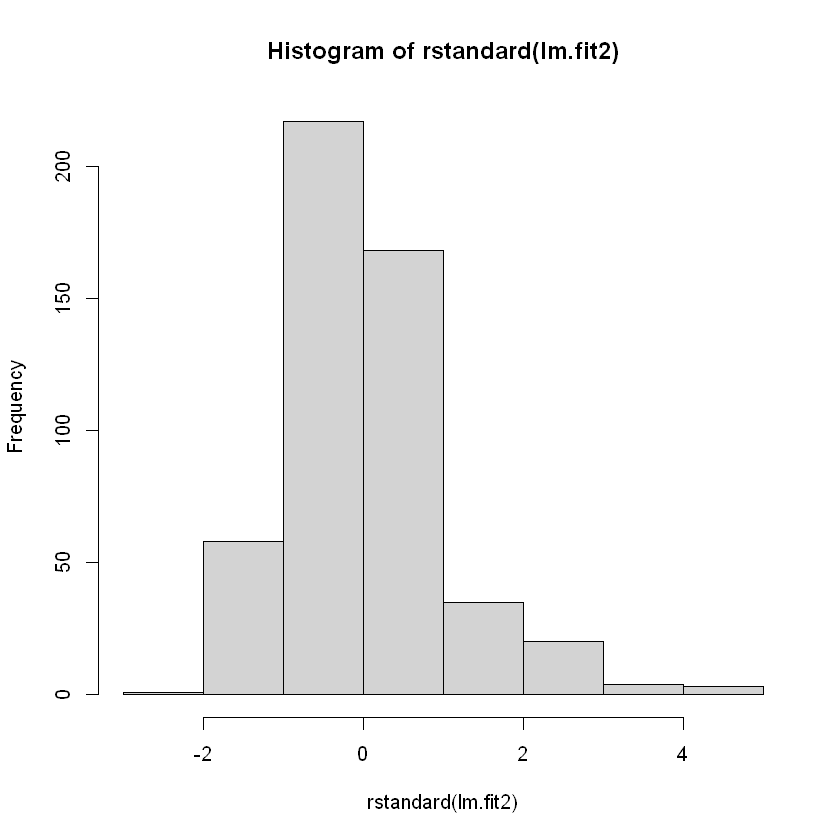

In [13]:
hist(rstandard(lm.fit2), breaks=10)

**También, visualizar directamente la Cook's distance, para ver si hay outliers. Los hay si hay valores por encima de 1.**

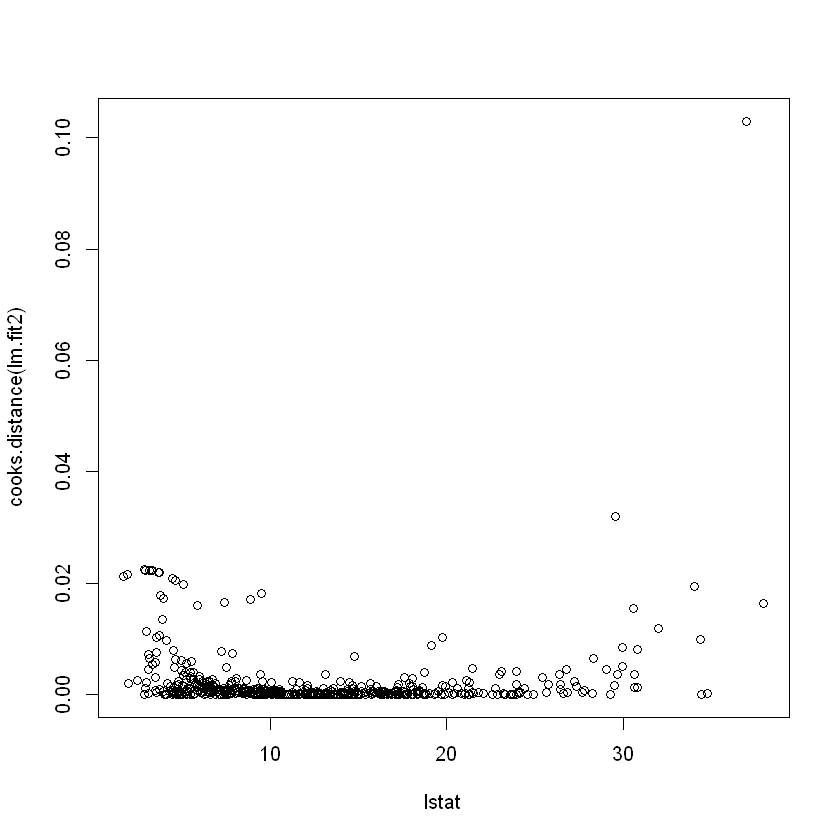

In [14]:
plot(lstat, cooks.distance(lm.fit2))

**Apliquemos algunos de los tests sobre los requisitos para validar el uso de la regresión.**

**Test de Durwin Watson sobre autocorrelación:**

In [16]:
library(lmtest)
dwtest(lm.fit2)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




	Durbin-Watson test

data:  lm.fit2
DW = 0.9215, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


**Parece que encuentra cierta autocorrelación positiva entre los residuos.**

**Test de Breusch-Pagan sobre heteroscedasticidad:**

In [17]:
bptest(lm.fit2)


	studentized Breusch-Pagan test

data:  lm.fit2
BP = 48.74, df = 2, p-value = 2.608e-11


**Con el valor tan pequeño de p-value obtenido, concluimos que la varianza de los residuos no es constante (como se puede observar a partir de los gráficos anteriores).** 

**Test de normalidad de los residuos:**

In [26]:
#install.packages("olsrr")

In [25]:
library(olsrr)
ols_test_normality(lm.fit2)


Attaching package: ‘olsrr’

The following object is masked from ‘package:datasets’:

    rivers

Warning message in ks.test(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9358         0.0000 
Kolmogorov-Smirnov        0.0894          6e-04 
Cramer-von Mises         39.0688         0.0000 
Anderson-Darling          7.3695         0.0000 
-----------------------------------------------

**Todos los tests descartan la normalidad de los residuos.**

**En conclusión, estos datos claramente no cumplen varios de los requisitos. Aún así, esto no debe descartar que podamos utilizar una regresión, ya que sí nos aporta información cuantitativa de la dependencia entre mdev y lstat, y permite realizar una predicción, aunque el error estimado no sea del todo correcto.** 